# Исследование систем управления

In [36]:
# ÿ + 3ẏ + 4y = 4 ̇ + 2u

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, integrate

num_c = [4, 2]          # 4s + 2
den_c = [1, 3, 4]       # s² + 3s + 4
sys_c = signal.TransferFunction(num_c, den_c)

A = np.array([[0, 1],
              [-4, -3]])
B = np.array([[0],
              [1]])
C = np.array([[2, 4]])
D = np.array([[0]])


## Устойчивость

In [37]:
poles = sys_c.poles
print("Poles:", poles)
if np.all(np.real(poles) < 0):
    print("The system is stable.")
else:
    print("The system is unstable.")

Poles: [-1.5+1.32287566j -1.5-1.32287566j]
The system is stable.


## Управляемость и наблюдаемость

In [38]:
# controllability matrix
Q_c = np.hstack([B, A @ B])
print("Rank of controllability matrix:", np.linalg.matrix_rank(Q_c))
if np.linalg.matrix_rank(Q_c) == A.shape[0]:
    print("The system is controllable.")
else:
    print("The system is uncontrollable.")

# observability matrix
Q_o = np.vstack([C, C @ A])
print("Rank of observability matrix:", np.linalg.matrix_rank(Q_o))
if np.linalg.matrix_rank(Q_o) == A.shape[0]:
    print("The system is observable.")
else:
    print("The system is unobservable.")

Rank of controllability matrix: 2
The system is controllable.
Rank of observability matrix: 2
The system is observable.


## Переходная и импульсная характеристики

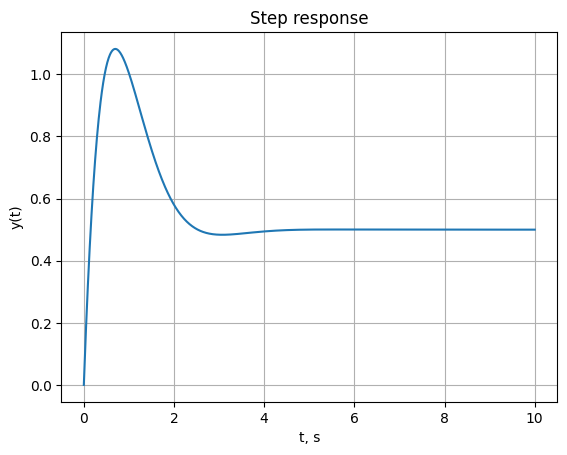

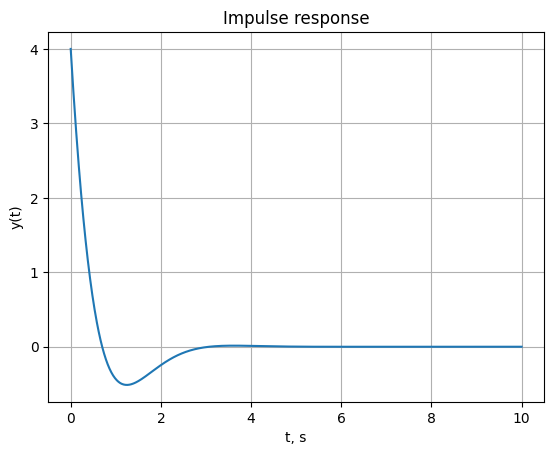

In [39]:
t = np.linspace(0, 10, 1000)
t_step, y_step = signal.step(sys_c, T=t)
t_imp, y_imp = signal.impulse(sys_c, T=t)
plt.figure()
plt.plot(t_step, y_step)
plt.xlabel("t, s")
plt.ylabel("y(t)")
plt.title("Step response")
plt.grid(True)
plt.figure()
plt.plot(t_imp, y_imp)
plt.xlabel("t, s")
plt.ylabel("y(t)")
plt.title("Impulse response")
plt.grid(True)
plt.show()

### Извлечение показателей от переходных и импульсных характеристик

In [40]:
# Показатели переходной характеристики
print("Step response parameters:")
# установившееся значение
y_steady = y_step[-1]
print("Steady state value: {:.3f}".format(y_steady))

# перерегулирование
overshoot = (y_step.max() - y_steady) / y_steady * 100
print("Overshoot: {:.3f}%".format(overshoot))

# время подъема
rise_time = t_step[np.where(y_step >= 0.9 * y_steady)[0][0]] - t_step[np.where(y_step >= 0.1 * y_steady)[0][0]]
print("Rise time: {:.3f} s".format(rise_time))

# время установления
tolerance = 0.02 * y_steady
for idx in range(len(y_step)):
    if np.all(np.abs(y_step[idx:] - y_steady) <= tolerance):
        settling_time = t_step[idx]
        break
else:
    settling_time = np.nan  # не установилась

print("Settling time: {:.3f} s".format(settling_time))

Step response parameters:
Steady state value: 0.500
Overshoot: 116.389%
Rise time: 0.120 s
Settling time: 3.684 s


Установившиеся значение - это значение, к которому система стремится в бесконечности.

Перерегулирование - это максимальное отклонение выходного сигнала от установленного значения, выраженное в процентах.

Время подъема - это время, за которое выходной сигнал системы поднимается от 10% до 90% установленного значения.

Время установления - это время, за которое выходной сигнал системы остается в пределах заданного диапазона отклонения от установленного значения (например, ±2%).

In [41]:
# Показатели импульсной характеристики
print("Impulse response parameters:")
# устойчивое значение
y_steady_imp = y_imp[-1]
print("Steady state value: {:.3f}".format(y_steady_imp))

# статический коэффициент k_DC (равен установленному значению в переходной характеристике)
k_DC = np.trapezoid(y_imp, t_imp)
print("Static gain k_DC: {:.3f}".format(k_DC))

# Колебательные параметры:
from scipy.signal import find_peaks
peaks,_ = find_peaks(y_imp)
t_p1 = t_imp[peaks[0]];  y_p1 = y_imp[peaks[0]]
t_p2 = t_imp[peaks[1]];  y_p2 = y_imp[peaks[1]]
T_d = t_p2 - t_p1;       omega_d = 2*np.pi/T_d
delta = np.log(y_p1/y_p2)
zeta   = delta/np.sqrt(4*np.pi**2 + delta**2)
omega_n= omega_d/np.sqrt(1-zeta**2)

print("Damping ratio zeta: {:.3f}".format(zeta))
print("Natural frequency omega_n: {:.3f} rad/s".format(omega_n))
print("Damped frequency omega_d: {:.3f} rad/s".format(omega_d))


Impulse response parameters:
Steady state value: 0.000
Static gain k_DC: 0.500
Damping ratio zeta: 0.750
Natural frequency omega_n: 2.002 rad/s
Damped frequency omega_d: 1.324 rad/s


Устойчивое значение — это значение, к которому система стремится в бесконечности. При нуле подтверждает устойчивость системы.

Статический коэффициент k_DC — это значение выходного сигнала системы при постоянном входном сигнале. Совпадает с установившимся значением переходной характеристики.

Демпфирование — это мера затухания колебаний системы. Чем больше значение приближается к 1, тем быстрее система возвращается к установленному значению.

Натуральная частота - это частота, с которой система колебалась бы в отсутствие демпфирования.

Демпфированная частота - это частота, с которой система реально колеблется.

## Диаграмма Боде

DC gain = 0.500
Peak = 2.8 dB at ω=1.87 rad/s
PM = 130.4° at ω=3.76 rad/s
GM = 8.0 dB at ω=10.00 rad/s


Text(0.5, 1.0, 'Bode phase')

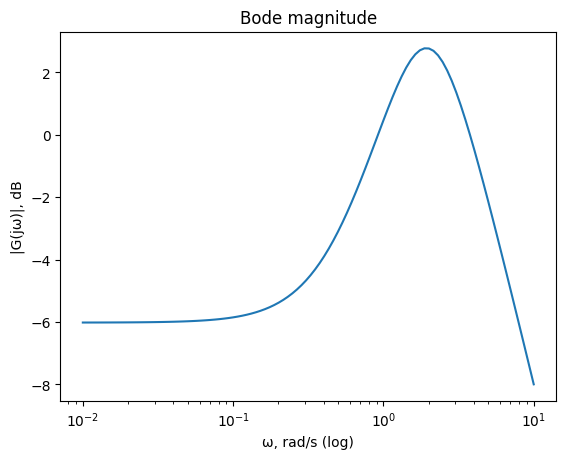

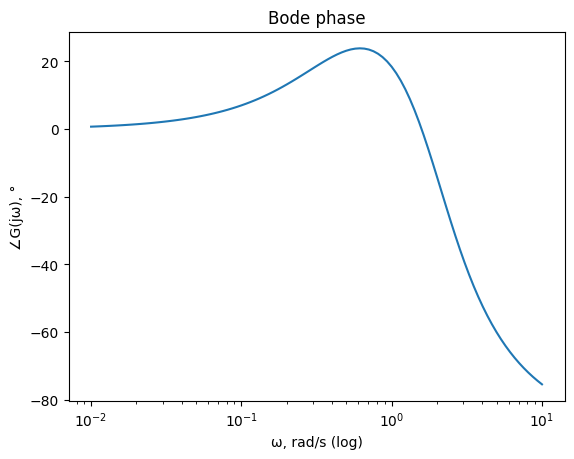

In [48]:
w, mag, phase = signal.bode(sys_c)

plt.figure()
plt.semilogx(w, mag)
plt.xlabel("ω, rad/s (log)")
plt.ylabel("|G(jω)|, dB")
plt.title("Bode magnitude")

plt.figure()
plt.semilogx(w, phase)
plt.xlabel("ω, rad/s (log)")
plt.ylabel("∠G(jω), °")
plt.title("Bode phase")

## Фазовый портрет

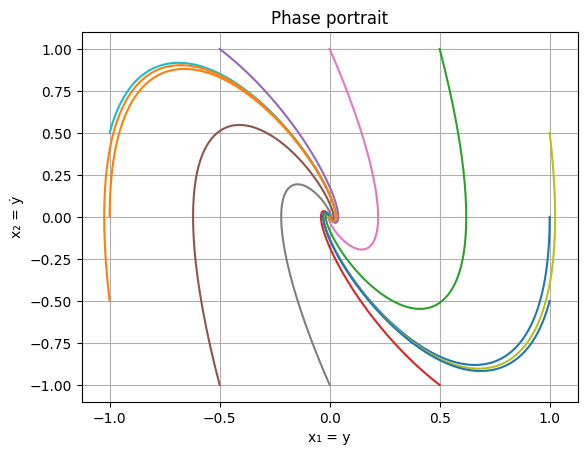

In [55]:
def f(t, x):
    return (A @ x).flatten()

# множество начальных точек
init_conds = [np.array([1, 0]),
              np.array([-1, 0]),
              np.array([0.5, 1]),
              np.array([0.5, -1]),
              np.array([-0.5, 1]),
              np.array([-0.5, -1]),
              np.array([0, 1]),
              np.array([0, -1]),
              np.array([1, 0.5]),
              np.array([-1, 0.5]),
              np.array([1, -0.5]),
              np.array([-1, -0.5])
              ]

plt.figure()

# решаем ОДУ для каждой точки
for x0 in init_conds:
    sol = integrate.solve_ivp(
        fun=f,
        t_span=(0, 10),
        y0=x0,
        t_eval=np.linspace(0,10,800)
    )
    plt.plot(sol.y[0], sol.y[1])

plt.xlabel("x₁ = y")
plt.ylabel("x₂ = ẏ")
plt.title("Phase portrait")
plt.grid(True)


## Дискретизация системы

Ad =
 [[ 0.98191772  0.08581998]
 [-0.34327991  0.72445779]]
Bd =
 [[0.00452057]
 [0.08581998]]
Cd =
 [[2 4]]
Dd = [[0]]

Собственные значения Ad: [0.85318776+0.11352916j 0.85318776-0.11352916j]
Максимальное |eig| = 0.860707976425058
Устойчиво ли (|eig|<1)? True


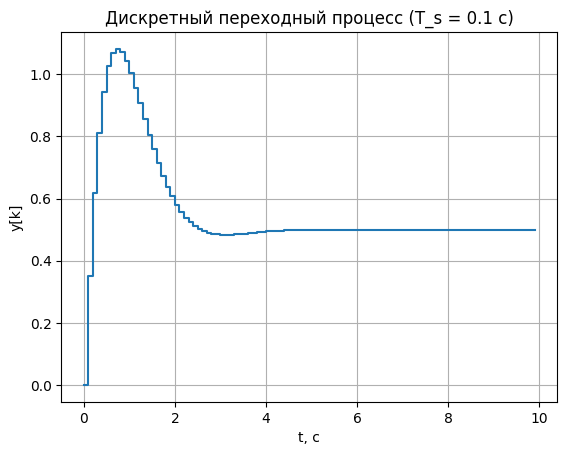

In [58]:
T_s = 0.1
Ad, Bd, Cd, Dd, dt = signal.cont2discrete((A, B, C, D), T_s, method='zoh')

print("Ad =\n", Ad)
print("Bd =\n", Bd)
print("Cd =\n", Cd)
print("Dd =", Dd)

# Оценка устойчивости: собственные значения Ad
eigs = np.linalg.eigvals(Ad)
print("\nСобственные значения Ad:", eigs)
print("Максимальное |eig| =", np.max(np.abs(eigs)))
print("Устойчиво ли (|eig|<1)?", np.all(np.abs(eigs) < 1))

# Построение переходного процесса (step response)
N_steps = 100  # число отсчётов
u = np.ones(N_steps)          # единичная ступень
t = np.arange(N_steps) * T_s  # время в секундах

t_out, y_out, x_out = signal.dlsim((Ad, Bd, Cd, Dd, dt), u)

plt.figure()
plt.step(t, y.squeeze(), where='post')
plt.xlabel('t, с')
plt.ylabel('y[k]')
plt.title('Дискретный переходный процесс (T_s = 0.1 с)')
plt.grid(True)
plt.show()